Most of the contents of this notebook were prepared by Dr. Edward Raff (Spring 2019)

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import datasets
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics.pairwise import polynomial_kernel

import warnings 
warnings.filterwarnings("ignore")


In [17]:

def plot_2d_examples(classifiers, names, datasets, figsize=(27,9), h = .02):
  """
  Here we define a helper method. We want to make a lot of visualizations, so lets 
  organize the visualization code into a method we can re-use. 
  - classifiers is a list of scikit-learn classifier objects
  - names is a list of strings, with the name we should use for each classifier in 'classifiers'. As such they should have the same length
  - datasets will be a list of 2D datasets, each being a tuple of (X, y)
  - h is the step size of the mesh. Smaller sizes show more detail
  """
  figure = plt.figure(figsize=figsize)
  i = 1
    
  # iterate over datasets
  for ds_cnt, ds in enumerate(datasets):
      # preprocess dataset, split into training and test part
      X, y = ds

      X = StandardScaler().fit_transform(X)
      X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4, random_state=42)

      x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
      y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
      xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                           np.arange(y_min, y_max, h))

      # just plot the dataset first
      cm = plt.cm.RdBu
      cm_bright = ListedColormap(['#FF0000', '#0000FF'])
      ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
      if ds_cnt == 0:
          ax.set_title("Input data")
      # Plot the training points
      ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
                 edgecolors='k')
      # Plot the testing points
      ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6,
                 edgecolors='k')
      ax.set_xlim(xx.min(), xx.max())
      ax.set_ylim(yy.min(), yy.max())
      ax.set_xticks(())
      ax.set_yticks(())
      i += 1

      # iterate over classifiers
      for name, clf in zip(names, classifiers):
          ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
          clf.fit(X_train, y_train)
          score = clf.score(X_test, y_test)

          # Plot the decision boundary. For that, we will assign a color to each
          # point in the mesh [x_min, x_max]x[y_min, y_max].
          if hasattr(clf, "decision_function"):
              Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
          else:
              Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

          # Put the result into a color plot
          Z = Z.reshape(xx.shape)
          ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

          # Plot the training points
          ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
                     edgecolors='k')
          # Plot the testing points
          ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
                     edgecolors='k', alpha=0.6)

          ax.set_xlim(xx.min(), xx.max())
          ax.set_ylim(yy.min(), yy.max())
          ax.set_xticks(())
          ax.set_yticks(())
          if ds_cnt == 0:
              ax.set_title(name)
          ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
                  size=15, horizontalalignment='right')
          i += 1

  plt.tight_layout()
  plt.show()

# Homework 4 (due 20th July, 11:59 PM)

1.  Use Iris dataset with only two features, namely petal length (cm) and petal width (cm).
2.  Convert your data into a two-class dataset, such that Virginica (class=2) will be one class and Setosa and Versicolor (class=1 and class=0) samples will constitute the other class.
3.  Get your new dataset ready to be fed into the provided plot_2d_examples function.
4.  Using plot_2d_examples function, evaluate different SVM classifiers with polynomial kernels of varying degrees. Also, try several $C$ values.





You should be able to get some figures like this:

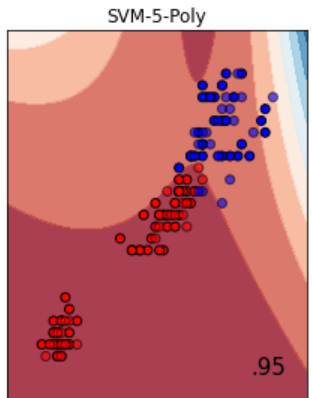

5.  Do not separate the train/test sets by yourselves, just feed into plot_2d_examples. It has its own split inside. Also it prints test set scores on the bottom corner of each figure. According to these scores, which (degree,$C$) pair produced the best results? Please indicate your answer explicitly.
6.  Also comment on $C$ values. Which $C$ value range is reasonable do you think? After which value, it looks like an overfit?

# **Q1**

In [18]:
# loading the iris data

data = datasets.load_iris()

In [19]:
#converting the iris data to dataframe

iris_df = pd.DataFrame(data=np.c_[data['data'], data['target']],columns= list(data['feature_names']) + ['target'])

In [20]:
# using only petal length & petal width features for the model

iris_df.drop(['sepal length (cm)','sepal width (cm)'],inplace= True,axis=1)  #dropping the unwanted columns from dataframe.

In [21]:
iris_df.head()

,petal length (cm),petal width (cm),target
0,1.4,0.2,0.0
1,1.4,0.2,0.0
2,1.3,0.2,0.0
3,1.5,0.2,0.0
4,1.4,0.2,0.0


# **Q2**

In [22]:
#converting the data to two class dataset

iris_df['target']=iris_df['target'].replace([0,1],0)   # replacing the Versicolor and Setosa to one class named 0.
iris_df['target']=iris_df['target'].replace([2],1)     # replacing the Virginica to other class named 1.

In [23]:
iris_df['target'].unique()

array([0., 1.])

# **Q3**

In [24]:
#converting the iris dataframe to 2D array data

X= np.array(iris_df.drop('target', axis=1))
y= np.array(iris_df.drop(['petal length (cm)','petal width (cm)'],axis=1))
iris_ds= [(X,y)]
print(iris_ds)         


[(array([[1.4, 0.2],
       [1.4, 0.2],
       [1.3, 0.2],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.7, 0.4],
       [1.4, 0.3],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.5, 0.1],
       [1.5, 0.2],
       [1.6, 0.2],
       [1.4, 0.1],
       [1.1, 0.1],
       [1.2, 0.2],
       [1.5, 0.4],
       [1.3, 0.4],
       [1.4, 0.3],
       [1.7, 0.3],
       [1.5, 0.3],
       [1.7, 0.2],
       [1.5, 0.4],
       [1. , 0.2],
       [1.7, 0.5],
       [1.9, 0.2],
       [1.6, 0.2],
       [1.6, 0.4],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.6, 0.2],
       [1.6, 0.2],
       [1.5, 0.4],
       [1.5, 0.1],
       [1.4, 0.2],
       [1.5, 0.2],
       [1.2, 0.2],
       [1.3, 0.2],
       [1.4, 0.1],
       [1.3, 0.2],
       [1.5, 0.2],
       [1.3, 0.3],
       [1.3, 0.3],
       [1.3, 0.2],
       [1.6, 0.6],
       [1.9, 0.4],
       [1.4, 0.3],
       [1.6, 0.2],
       [1.4, 0.2],
       [1.5, 0.2],
       [1.4, 0.2],
       [4.7, 1.4],
       [4.5, 1.5],
       [4.

# **Q4**

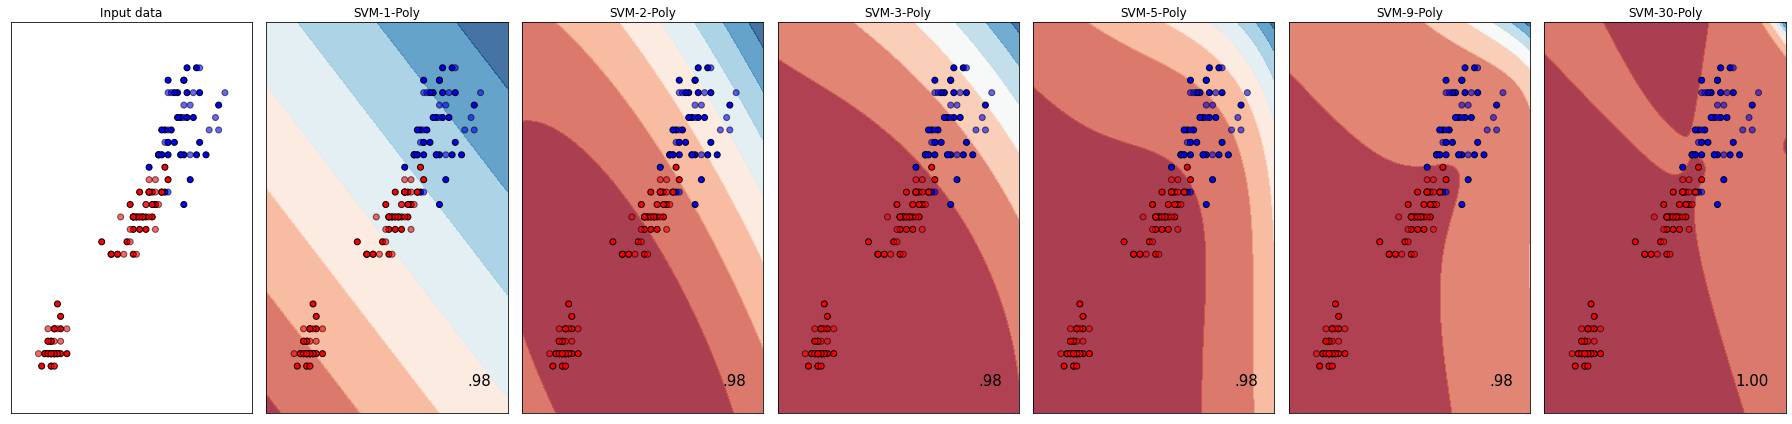

In [25]:
# Trying different degrees of polynomial for SVC and plotting them using plot_2d_examples

classifier = []
name = []

for i in [1, 2, 3, 5, 9, 30]:
    classifier.append(SVC(kernel='poly', degree=i, gamma='scale', coef0=1.0)) 
    name.append("SVM-"+str(i)+"-Poly")
plot_2d_examples(classifier, name, iris_ds, figsize=(25,6))



# *From above it is evident that the SVM classifier with 5 and 9 degree polynomial are performing better. Let us see different values of C for these poly degrees.*

# **Q5**

Training sample: 112
Test sample: 38


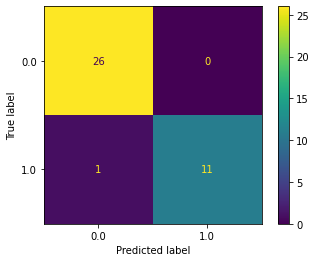

In [26]:
#using cross validation and hyper parameter tunning to find best paramters (C) of the SVM classifier that fits the data perfectly.

from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import ConfusionMatrixDisplay


dX_train, dX_test, dy_train, dy_test = train_test_split(X, y, test_size=0.25, random_state=42)

print(f'Training sample: {dX_train.shape[0]:,}')
print(f'Test sample: {dX_test.shape[0]:,}')

svm_pipeline = Pipeline([('scaling', StandardScaler()),
                                       ('model', SVC())])

param_grid = [
  {'model__C': [0.001,0.01, 0.1, 1, 10, 100, 1000], 'model__kernel': ['poly']}       #hyper parameter tunning

 ]

svm_res = GridSearchCV(estimator=svm_pipeline, param_grid=param_grid, scoring='accuracy', refit=True, cv=5) #5 fold cross validation
svm_res = svm_res.fit(dX_train, dy_train)

ConfusionMatrixDisplay.from_estimator(svm_res, dX_test, dy_test)       #confusion matrix of best estimator
plt.show()

In [27]:
#accuracy score of the model

svm_score = svm_res.score(dX_test, dy_test)

print(f'Support Vector Machine Score: {svm_score:.2%}')

Support Vector Machine Score: 97.37%


In [28]:
# best parameters of the model estimator

print('\n Best params: ', svm_res.best_params_)


 Best params:  {'model__C': 1, 'model__kernel': 'poly'}


Using 5 fold Cross validation and hyper parameter tunning it is clear that the best parameters for the SVM are C= 1 and kernel= poly.

# **Q6**

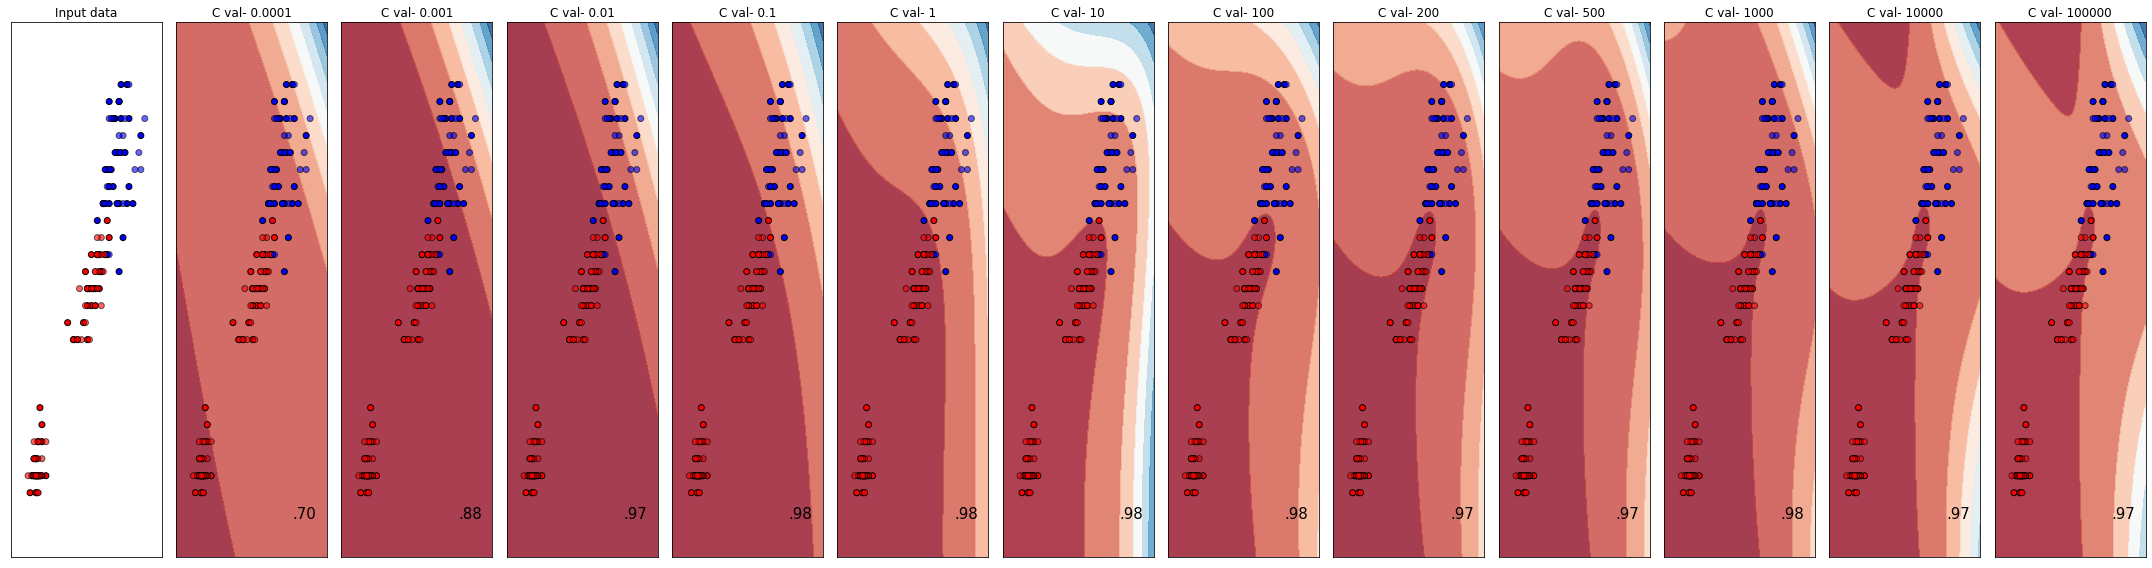

In [29]:
#Plotting Different C values using plot_2D_examples for 5-deg poly SVM clf

classifier = []
name = []

for i in [0.0001, 0.001, 0.01, 0.1, 1, 10, 100,200,500, 1000,10000, 100000]:                 #different C values
    classifier.append(SVC(C=i,kernel='poly', degree=5, gamma='scale', coef0=1.0)) 
    name.append("C val- "+str(i))
plot_2d_examples(classifier, name, iris_ds, figsize=(30,8*1))

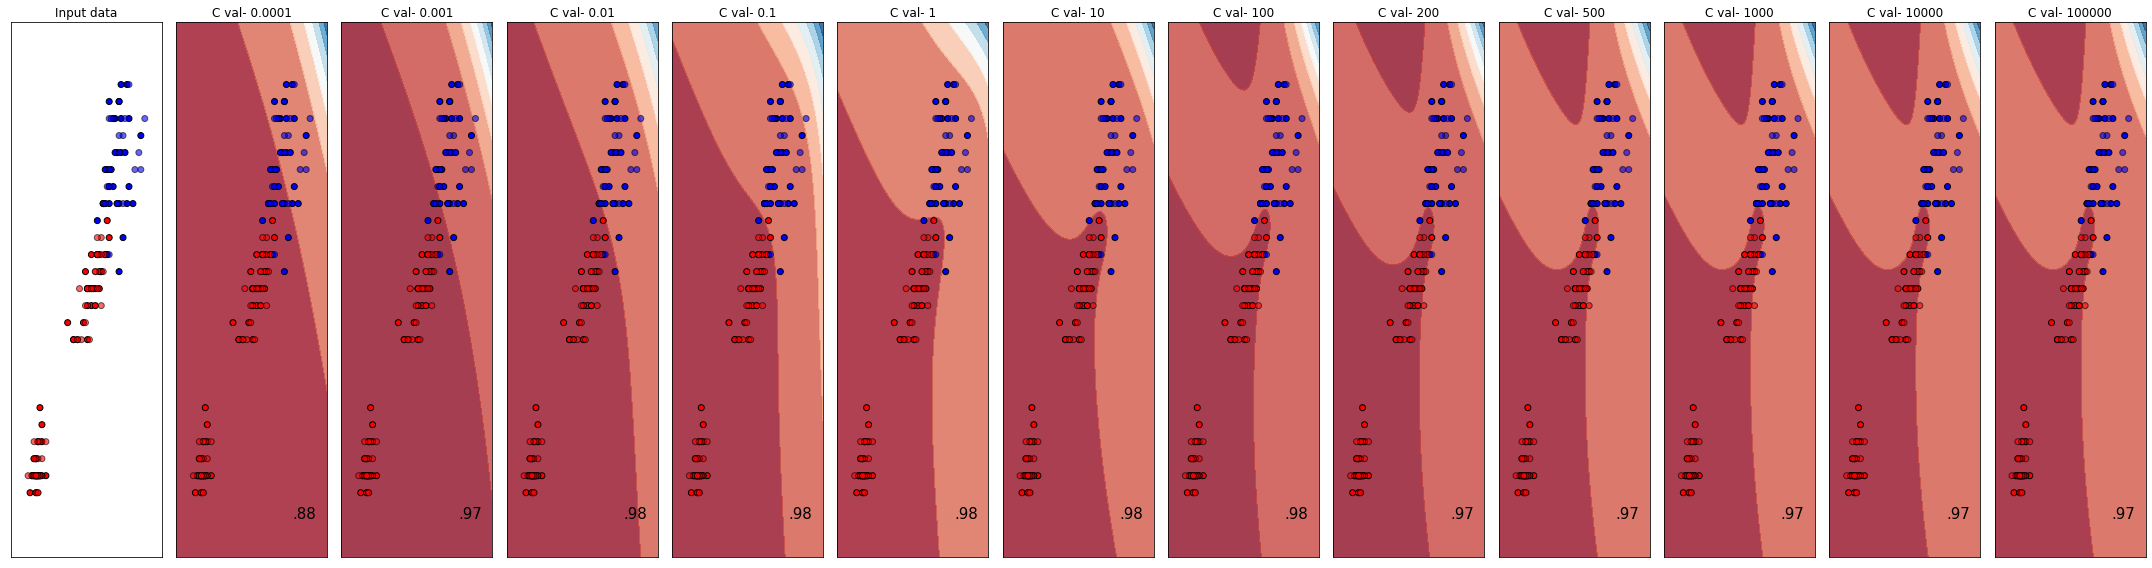

In [30]:
#Plotting Different C values using plot_2D_examples for 9-deg poly SVM clf

classifier = []
name = []

for i in [0.0001, 0.001, 0.01, 0.1, 1, 10, 100,200,500, 1000,10000, 100000]:                #different C values
    classifier.append(SVC(C=i,kernel='poly', degree=9, gamma='scale', coef0=1.0)) 
    name.append("C val- "+str(i))
plot_2d_examples(classifier, name, iris_ds, figsize=(30,8*1))

# *From the above figures it is evident that the 5 and 9 deg polynomial SVM classifiers are performing better with the **C** value in between 1 to 100, when C > 100 the chances of over fitting is high as the model is classifying the training points perfectly, hence they might not perform well on unseen data.*